In [28]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [4]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data1 = data.drop('ID#',axis=1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
def norm(i):
  x = (i-i.min()/i.max()-i.min())
  return x

In [8]:
data_norm = norm(data1)

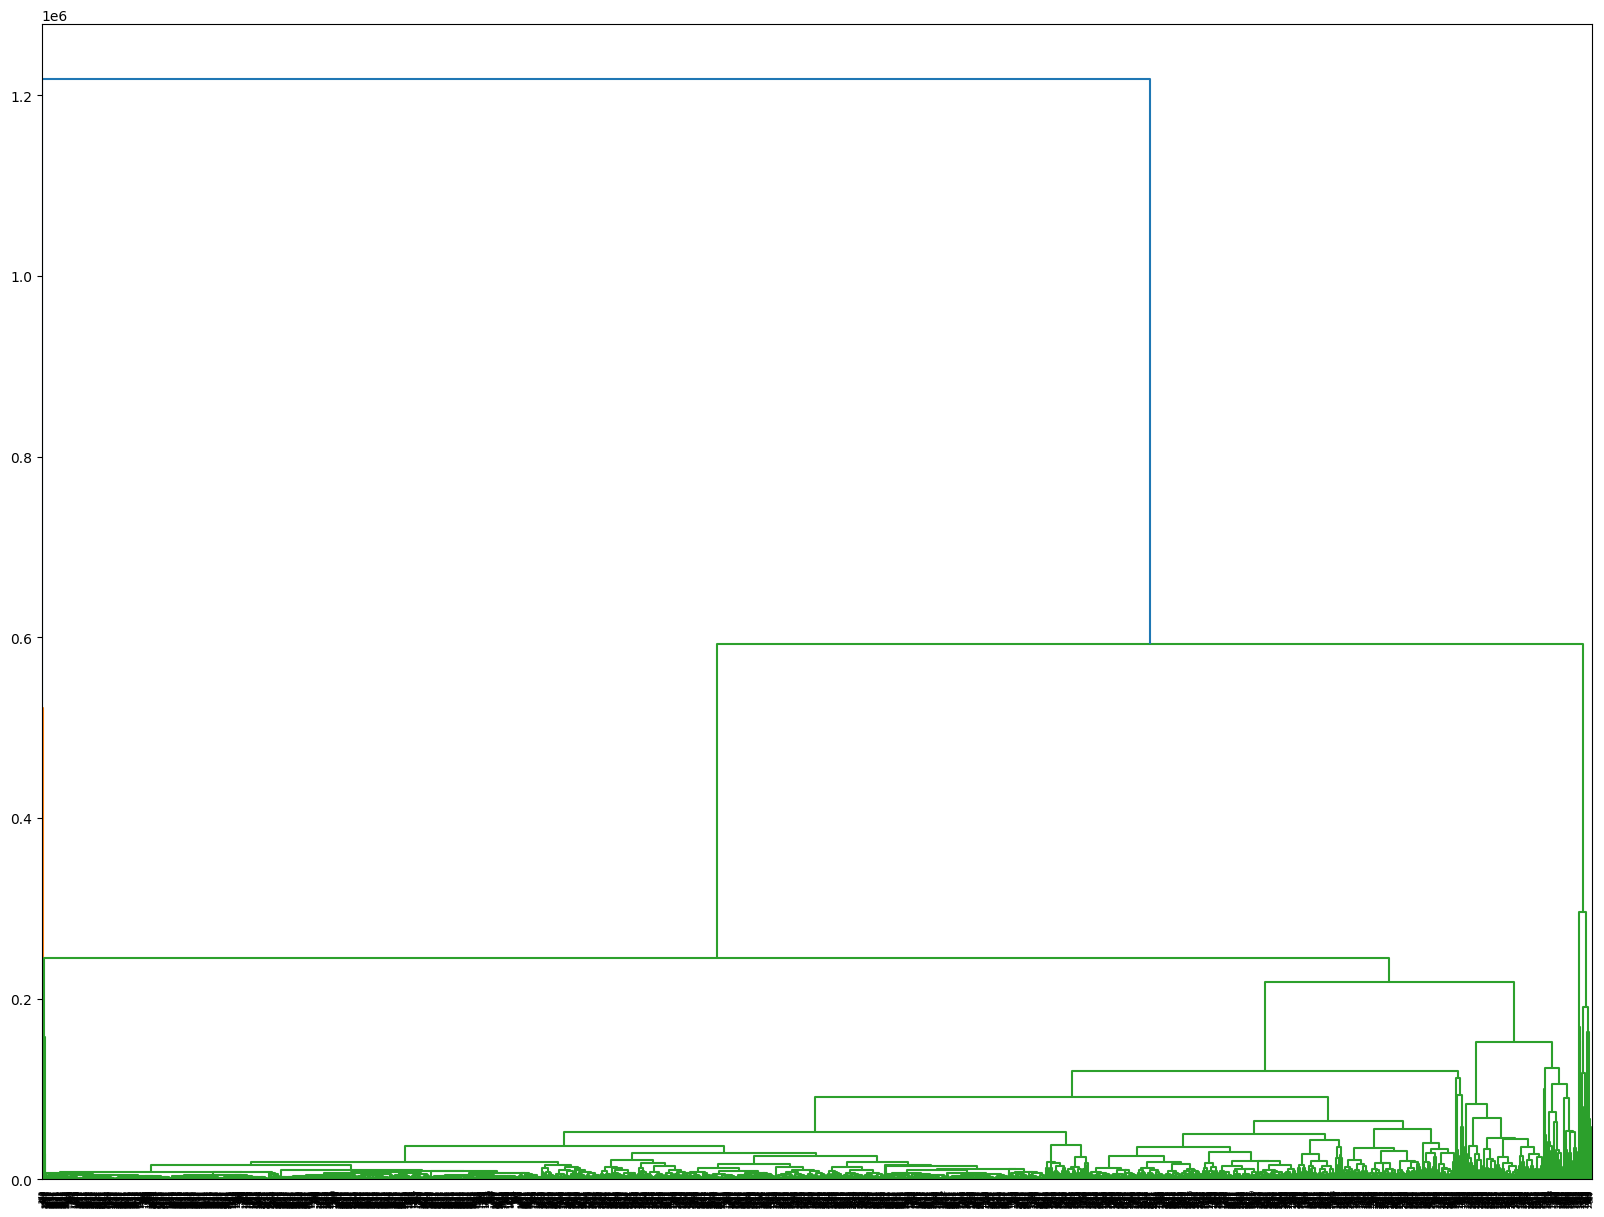

In [9]:
#Creating Dendrogram
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

#Hierarchical Clustering

In [10]:
data_hc = data

In [11]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(data_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [13]:
data2 = pd.concat([data_norm,Clusters], axis=1)
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143.0,0.0,-0.2,-0.333333,-0.2,174.0,1.0,0.0,0.0,6997.999759,0.0,0
1,19244.0,0.0,-0.2,-0.333333,-0.2,215.0,2.0,0.0,0.0,6965.999759,0.0,0
2,41354.0,0.0,-0.2,-0.333333,-0.2,4123.0,4.0,0.0,0.0,7031.999759,0.0,0
3,14776.0,0.0,-0.2,-0.333333,-0.2,500.0,1.0,0.0,0.0,6949.999759,0.0,0
4,97752.0,0.0,2.8,-0.333333,-0.2,43300.0,26.0,2077.0,4.0,6932.999759,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,-0.2,-0.333333,-0.2,8525.0,4.0,200.0,1.0,1400.999759,1.0,0
3995,64385.0,0.0,-0.2,-0.333333,-0.2,981.0,5.0,0.0,0.0,1392.999759,1.0,0
3996,73597.0,0.0,1.8,-0.333333,-0.2,25447.0,8.0,0.0,0.0,1399.999759,1.0,0
3997,54899.0,0.0,-0.2,-0.333333,-0.2,500.0,1.0,500.0,1.0,1398.999759,0.0,0


In [14]:
data2['Clusters'].value_counts()

0    3961
2      28
4       5
1       4
3       1
Name: Clusters, dtype: int64

In [15]:
data2.sort_values("Clusters")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143.0,0.0,-0.2,-0.333333,-0.2,174.0,1.0,0.0,0.0,6997.999759,0.0,0
2658,27438.0,0.0,-0.2,-0.333333,-0.2,2528.0,6.0,2528.0,6.0,2487.999759,0.0,0
2659,14748.0,0.0,-0.2,-0.333333,-0.2,2210.0,7.0,0.0,0.0,2494.999759,1.0,0
2660,49514.0,0.0,-0.2,-0.333333,-0.2,4500.0,22.0,0.0,0.0,2566.999759,0.0,0
2661,7457.0,0.0,-0.2,-0.333333,-0.2,17131.0,5.0,0.0,0.0,2493.999759,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
510,889456.0,1024.0,3.8,-0.333333,-0.2,98959.0,29.0,850.0,4.0,6649.999759,1.0,4
117,969559.0,0.0,-0.2,-0.333333,-0.2,2500.0,3.0,1000.0,2.0,7715.999759,1.0,4
1188,837979.0,0.0,-0.2,-0.333333,-0.2,18372.0,15.0,1450.0,4.0,5370.999759,1.0,4
3772,822321.0,0.0,3.8,-0.333333,-0.2,138334.0,26.0,600.0,2.0,3285.999759,1.0,4


#K-Means

In [16]:
data_KMeans = data

In [17]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data1)
data_sc

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

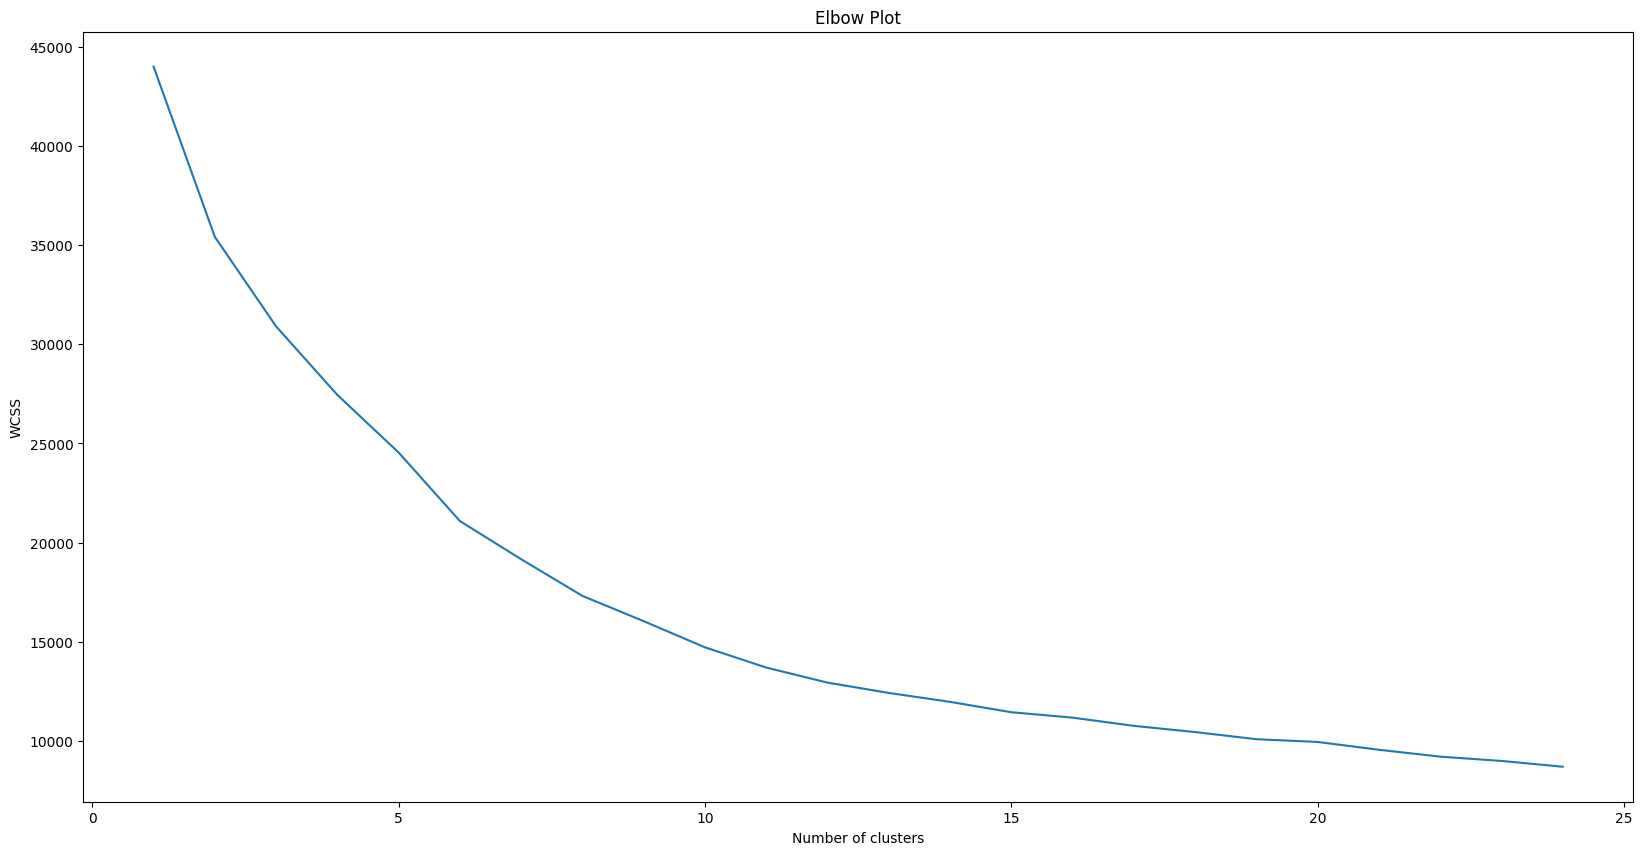

In [18]:
#Calculating correct number of clusters.
wcss = []
for i in range(1,25):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(data_sc)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1,25),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Taking 10 as the elbow point, i.e. optimum number of clusters will be 10

In [19]:
cluster_new = KMeans(n_clusters=10,random_state=0)
cluster_new.fit_transform(data1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 27960.89940851, 406339.34826213, 272810.9595827 , ...,
        710564.07114946,  85964.32872571,  61953.57823736],
       [ 36365.45302004, 415165.09171479, 281591.50817817, ...,
        719425.86364662,  94714.88476082,  67169.78693808],
       [ 14406.88530533, 392745.62645829, 259144.34582398, ...,
        697064.22458019,  72274.87892112,  52242.1059118 ],
       ...,
       [ 24959.55740479, 358642.13225656, 224617.05343276, ...,
        663431.50526182,  40280.47149628,  29372.69701739],
       [  9943.6169011 , 379789.92582185, 246406.07871201, ...,
        683899.81023122,  59834.86316604,  52195.29925352],
       [ 52157.77786441, 431325.9878334 , 297686.53232672, ...,
        735627.67739893, 110798.74068746,  78632.05959591]])

In [20]:
cluster_new.labels_

array([3, 3, 0, ..., 0, 0, 3], dtype=int32)

In [21]:
data_KMeans['Clusters'] = cluster_new.labels_
data_KMeans

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
data_KMeans['Clusters'].value_counts()

3    1700
0     909
8     502
9     322
5     233
6     165
2      87
1      55
7      21
4       5
Name: Clusters, dtype: int64

In [23]:
data_KMeans.sort_values('Clusters')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1022,1033,66015,0,2,1,1,26706,30,2676,7,5790,1,0
1342,1355,62942,500,1,1,1,4752,8,2121,6,5070,0,0
3456,3479,63121,0,3,1,1,16634,16,150,1,1349,0,0
656,665,50500,0,1,1,1,4765,14,0,0,6380,0,0
1341,1354,73008,0,3,1,1,12930,18,0,0,5050,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,3054,68532,0,5,1,1,68704,21,0,0,2822,1,9
3042,3064,45533,0,5,1,1,56208,16,0,0,2963,1,9
1105,1117,88929,0,4,1,1,44932,20,650,2,5694,1,9
1725,1741,64341,0,5,1,1,63621,13,0,0,4568,1,9


In [24]:
data_KMeans.iloc[:,[0,-1]]

,ID#,Clusters
0,1,3
1,2,3
2,3,0
3,4,3
4,5,8
...,...,...
3994,4017,3
3995,4018,0
3996,4019,0
3997,4020,0


#DBSCAN

In [25]:
data_db = data

In [29]:
scaler = StandardScaler()
data_sc1 = scaler.fit_transform(data1) 

In [31]:
cluster_new1 = DBSCAN(eps=1,min_samples=9)
cluster_new1.fit_predict(data_sc1)

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
data_db['Clusters'] = cluster_new1.labels_
data_db.sort_values('Clusters')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
966,977,2843,0,4,1,1,44130,35,7450,20,5869,1,-1
3096,3118,175501,1000,3,1,1,34318,36,7974,19,2691,0,-1
969,980,20702,0,4,1,1,30451,24,1100,5,5856,1,-1
972,983,132910,0,5,1,1,75540,46,250,1,5856,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,2
2317,2335,10458,0,1,2,1,10458,12,0,0,3726,0,2
3155,3177,21736,0,1,2,1,6672,10,0,0,2544,0,2
3959,3982,13942,0,1,2,1,5822,12,0,0,1458,0,2


In [33]:
data_db.iloc[:,[0,-1]]

,ID#,Clusters
0,1,0
1,2,0
2,3,0
3,4,0
4,5,-1
...,...,...
3994,4017,1
3995,4018,1
3996,4019,1
3997,4020,0
